<a href="https://colab.research.google.com/github/CKabuga/intro-to-github/blob/main/PenguinsDataset_dss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import Libraries

In [11]:
import pandas as pd
import numpy as np
from pandas import read_csv
#from pandas.plotting import scatter_matrix
#from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Load Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
###################METHOD 1 - TO READ FROM YOUR OWN FILE IN DRIVE

!pwd
%cd /content/drive/MyDrive/dss
%ls

dataset = read_csv('penguins.csv')
print (dataset)




/content/drive/My Drive/dss
/content/drive/MyDrive/dss
apple_stock.csv  apple_stock.gsheet  flower_dataset.csv  iris.csv  penguins.csv
     rowid    species     island  bill_length_mm  bill_depth_mm  \
0        1     Adelie  Torgersen            39.1           18.7   
1        2     Adelie  Torgersen            39.5           17.4   
2        3     Adelie  Torgersen            40.3           18.0   
3        4     Adelie  Torgersen             NaN            NaN   
4        5     Adelie  Torgersen            36.7           19.3   
..     ...        ...        ...             ...            ...   
339    340  Chinstrap      Dream            55.8           19.8   
340    341  Chinstrap      Dream            43.5           18.1   
341    342  Chinstrap      Dream            49.6           18.2   
342    343  Chinstrap      Dream            50.8           19.0   
343    344  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0       

In [14]:
print (dataset.head(10))
print (dataset.tail(3))
print(dataset.shape)
print (dataset.describe())



   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   
5      6  Adelie  Torgersen            39.3           20.6              190.0   
6      7  Adelie  Torgersen            38.9           17.8              181.0   
7      8  Adelie  Torgersen            39.2           19.6              195.0   
8      9  Adelie  Torgersen            34.1           18.1              193.0   
9     10  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0 

In [15]:
dataset.shape

(344, 9)

In [16]:
dataset.dtypes

,0
rowid,int64
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object
year,int64


In [17]:
dataset.isna().sum()

,0
rowid,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11
year,0


# Visualizations

In [18]:
dataset

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


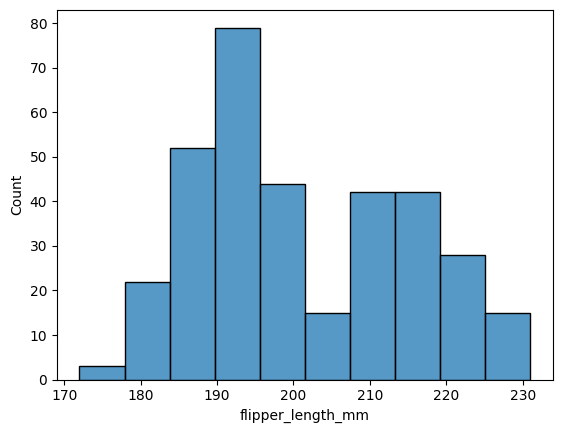

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(data=dataset, x='flipper_length_mm');

In [22]:
( dataset
 .loc[dataset.isnull().any(axis=1)])

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [23]:
dataset_cleaned = dataset.dropna()
dataset_cleaned.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


# Partitioning the data

In [29]:

# Split-out validation dataset
feature_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = dataset_cleaned[feature_columns]
Y = dataset_cleaned['species']

print (f'The shape of matrix x is: {X.shape}')
print (f'The shape of matrix y is: {Y.shape}')


The shape of matrix x is: (333, 4)
The shape of matrix y is: (333,)


# Model Creation and Training

In [45]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

In [46]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(max_depth=2)

In [52]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

# Predictions and Testing

In [53]:
y_pred = model.predict(X_test)
y_pred[0:10]


array(['Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo'], dtype=object)

In [57]:
predictions = model.predict(X_test)
print (X_test)
print(predictions)
print (y_pred)

print ('accuracy score')
print(accuracy_score(y_test, predictions))

print ('confusion matrix')
print(confusion_matrix(y_pred, predictions))


print ('classification report')
print(classification_report(y_pred, predictions))

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
30             39.5           16.7              178.0       3250.0
320            50.9           17.9              196.0       3675.0
79             42.1           19.1              195.0       4000.0
202            46.6           14.2              210.0       4850.0
63             41.1           18.2              192.0       4050.0
..              ...            ...                ...          ...
291            50.5           19.6              201.0       4050.0
4              36.7           19.3              193.0       3450.0
83             35.1           19.4              193.0       4200.0
322            50.1           17.9              190.0       3400.0
66             35.5           16.2              195.0       3350.0

[67 rows x 4 columns]
['Adelie' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Gent